In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
df = pd.read_csv("CARDIO_TRAIN.csv")
df.head()

,ID,AGE,GENDER,HEIGHT,WEIGHT,AP_HI,AP_LO,CHOLESTEROL,GLUC,SMOKE,ALCO,ACTIVE,CARDIO
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [9]:
#dùng pandas kiểm tra xem có bao nhiêu người trên 50 tuổi bị bệnh tim mạch (CARDIO=1)
len(df.loc[(df.AGE>=50) & (df.CARDIO==1)])

27099

In [12]:
df.columns

Index(['ID', 'AGE', 'GENDER', 'HEIGHT', 'WEIGHT', 'AP_HI', 'AP_LO',
       'CHOLESTEROL', 'GLUC', 'SMOKE', 'ALCO', 'ACTIVE', 'CARDIO'],
      dtype='object')

In [16]:
# Lấy ra tập dữ liệu có gender = 1, smoke = 1, alco = 1 and cardio=1
df.loc[(df.AGE < 50) & (df.GENDER==1) & (df.SMOKE==1) & (df.ALCO==1) & (df.CARDIO==1)]

,ID,AGE,GENDER,HEIGHT,WEIGHT,AP_HI,AP_LO,CHOLESTEROL,GLUC,SMOKE,ALCO,ACTIVE,CARDIO
1454,2047,46,1,156,74.0,130,90,1,1,1,1,1,1
4887,6917,48,1,160,68.0,140,90,3,3,1,1,1,1
10249,14624,48,1,167,106.0,120,80,1,2,1,1,0,1
12268,17517,49,1,164,92.0,145,90,2,1,1,1,1,1
12726,18162,49,1,155,86.0,130,90,1,1,1,1,1,1
13405,19136,40,1,185,95.0,140,90,2,1,1,1,1,1
15476,22114,49,1,160,90.0,150,80,1,1,1,1,1,1
18748,26777,48,1,166,81.0,150,1000,2,1,1,1,1,1
20156,28773,49,1,155,55.0,140,80,1,1,1,1,1,1
25469,36346,45,1,161,112.0,170,80,3,1,1,1,1,1


In [17]:
df.CHOLESTEROL.value_counts()

CHOLESTEROL
1    52385
2     9549
3     8066
Name: count, dtype: int64

In [18]:
#Trong những người bị bệnh tim(CARDIO=1), đếm xem có bao nhiêu người thuộc mỗi mức cholesterol
df.loc[df.CARDIO==1].CHOLESTEROL.value_counts()

CHOLESTEROL
1    23055
3     6174
2     5750
Name: count, dtype: int64

In [23]:

sort_data = df.loc[df.CARDIO==1].CHOLESTEROL.value_counts().sort_index()
dd = df.CHOLESTEROL.value_counts().sort_index()
sort_data/dd*100

CHOLESTEROL
1    44.010690
2    60.215729
3    76.543516
Name: count, dtype: float64

<Axes: >

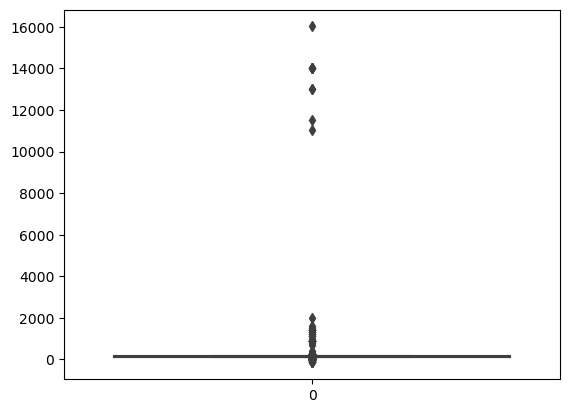

In [24]:
#AP_HI, AP_LO plot
sns.boxplot(df.AP_HI)

69712


<Axes: >

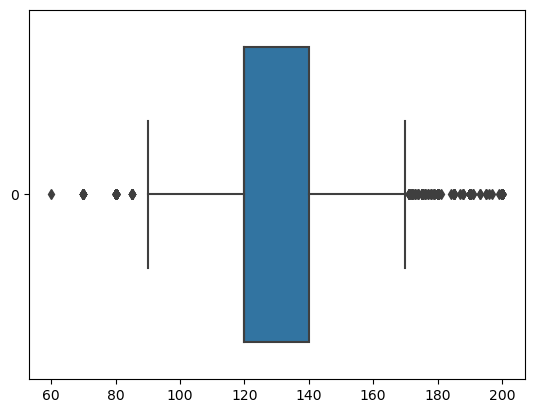

In [31]:
#kiểm tra xem có bao nhiêu hàm có AP_HI > 200.
#nếu số lượng không vượt quá 2% số lượng hàng, thì drop hết các hàng, sau đó vẽ lại biểu đồ của AP_HI
len(df.loc[df.AP_HI>200])
df_drop = df.loc[(50<=df.AP_HI) & (df.AP_HI<=200)]
print(len(df_drop))
sns.boxplot(df_drop.AP_HI,orient='h')

In [32]:
df_drop.head()

,ID,AGE,GENDER,HEIGHT,WEIGHT,AP_HI,AP_LO,CHOLESTEROL,GLUC,SMOKE,ALCO,ACTIVE,CARDIO
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [33]:
df.AP_LO.describe()

count    70000.000000
mean        96.630414
std        188.472530
min        -70.000000
25%         80.000000
50%         80.000000
75%         90.000000
max      11000.000000
Name: AP_LO, dtype: float64

68885


<Axes: >

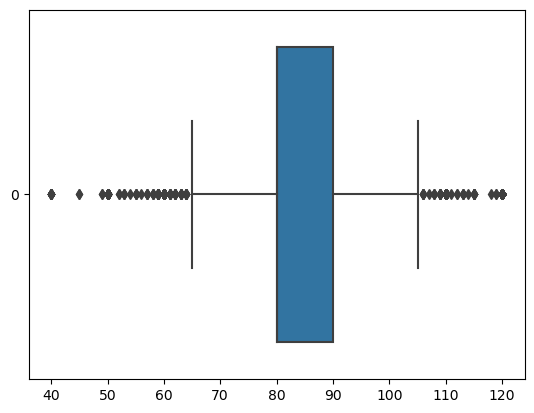

In [35]:
len(df.loc[df.AP_LO>200])
df_drop = df.loc[(40<=df.AP_LO) & (df.AP_LO<=120)]
print(len(df_drop))
sns.boxplot(df_drop.AP_LO,orient='h')

<Axes: >

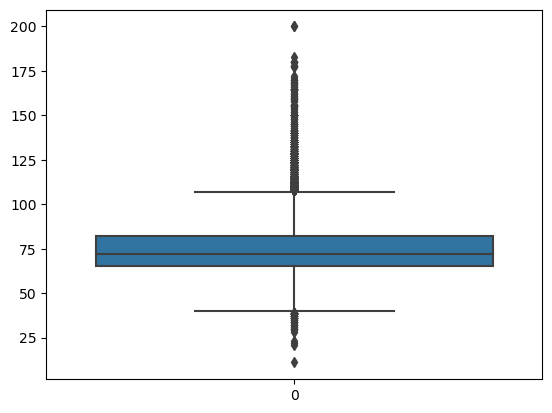

In [36]:
sns.boxplot(df_drop.WEIGHT)

<Axes: >

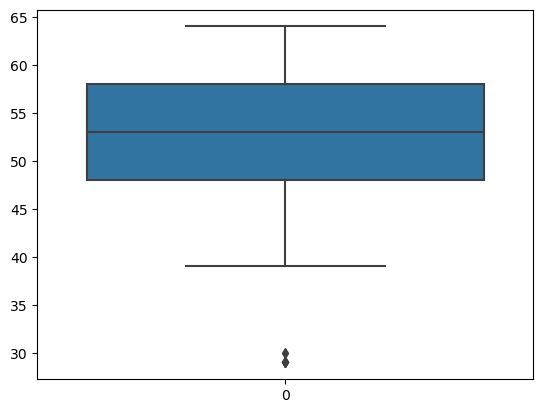

In [37]:
sns.boxplot(df_drop.AGE)

In [38]:
corr = df_drop.corr()
corr.CARDIO.sort_values(ascending=False)

CARDIO         1.000000
AP_LO          0.339102
AGE            0.239402
CHOLESTEROL    0.221108
WEIGHT         0.179468
GLUC           0.089262
AP_HI          0.053297
GENDER         0.007167
ID             0.003839
ALCO          -0.009066
HEIGHT        -0.010506
SMOKE         -0.016682
ACTIVE        -0.037457
Name: CARDIO, dtype: float64

<Axes: >

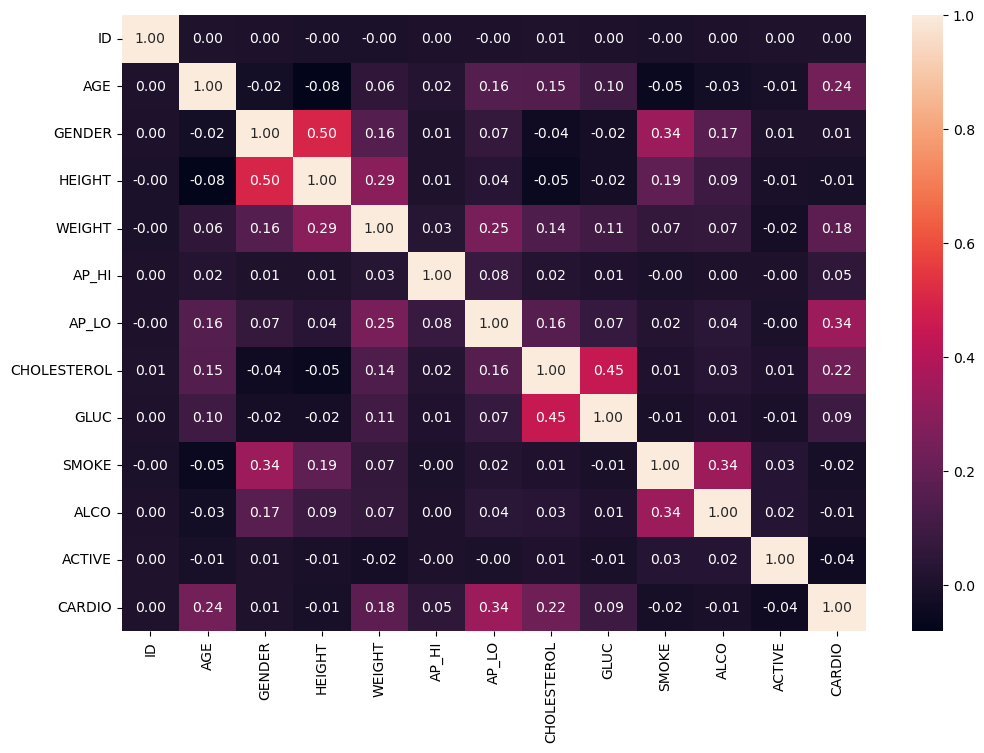

In [44]:
plt.figure(figsize=(12,8))
sns.heatmap(corr,cbar=True,fmt='1.2f',annot=True)

In [48]:
import numpy as np
NORMALIZE_COLUMNS = ['AGE','WEIGHT','AP_HI','AP_LO']
df_drop[NORMALIZE_COLUMNS] = (df_drop[NORMALIZE_COLUMNS] - np.mean(df_drop[NORMALIZE_COLUMNS])) / np.std(df_drop[NORMALIZE_COLUMNS])

C:\Users\User\AppData\Local\Temp\ipykernel_23612\2314756698.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drop[NORMALIZE_COLUMNS] = (df_drop[NORMALIZE_COLUMNS] - np.mean(df_drop[NORMALIZE_COLUMNS])) / np.std(df_drop[NORMALIZE_COLUMNS])


In [49]:
x = df_drop.drop(['CARDIO'],axis=1)
y = df_drop.CARDIO
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x,y,test_size=0.2,random_state=41)

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
rfc = RandomForestClassifier()
rfc.fit(Xtrain, Ytrain)
y_pred = rfc.predict(Xtest)
#dùng confusion matrix để tính accuracy, F1-Score, FP, FN, TP, TN